<a href="https://colab.research.google.com/github/coderzaman/Water-Potability-Predictor/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# --- Install necessary packages ---
!pip install xgboost

# --- Data Manipulation & Mathematical Operations ---
import numpy as np
import pandas as pd
from scipy.stats import randint

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preprocessing & Pipeline ---
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# --- Model Selection & Tuning ---
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     StratifiedKFold, RandomizedSearchCV)

# --- Machine Learning Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# --- Model Evaluation Metrics ---
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score, roc_curve)

# Set visual style for plots (Optional but recommended)
sns.set_theme(style="whitegrid")

### **1. Data Loading (5 Marks)**

In [74]:
# 1. Dataset Loading

file_id = '1cwa3cFYHQRErkRVhhvYg2FKEG30r-zIf'

# Construct the direct download URL
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

In [75]:
# 2. Display the first few rows (default is 5)
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [76]:
# 3. Display the shape of the dataset (rows, columns)
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(3276, 10)


### **2. Data Preprocessing (10 Marks)**


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [78]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


#### **Handling Null Value**

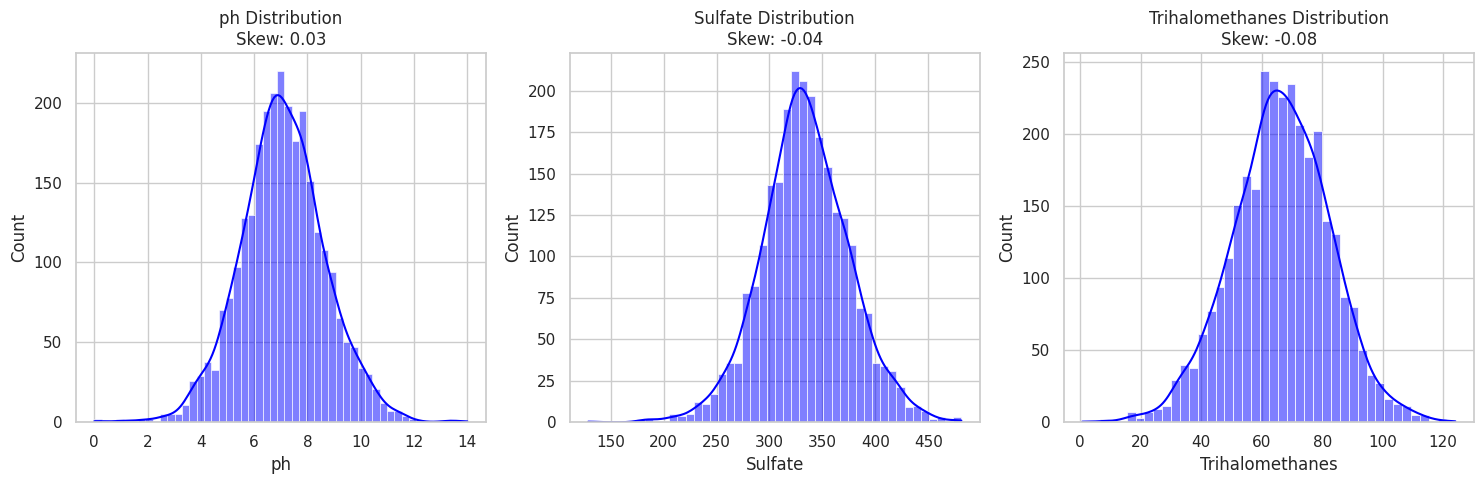

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Value Columns
missing_cols = ['ph', 'Sulfate', 'Trihalomethanes']

# Distribution Check (Visual Check)
plt.figure(figsize=(15, 5))
for i, col in enumerate(missing_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'{col} Distribution\nSkew: {df[col].skew():.2f}')
plt.tight_layout()
plt.show()

**Decision on Missing Value Imputation:**

We analyzed the distribution of the columns with missing values: ph, Sulfate, and Trihalomethanes.

* **ph Skewness:** 0.03

* **Sulfate Skewness:** -0.04

* **Trihalomethanes Skewness:** -0.08

Since the skewness values are very close to 0, it indicates that the data follows a **Normal Distribution** (centrally distributed). Therefore, the **Mean** is a representative measure of central tendency. We will impute the missing values in these columns using their respective means.

In [81]:
# Handling Missing Values based on Normal Distribution
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

# Verification: Check if any missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


**Outlier Detection and Removal**

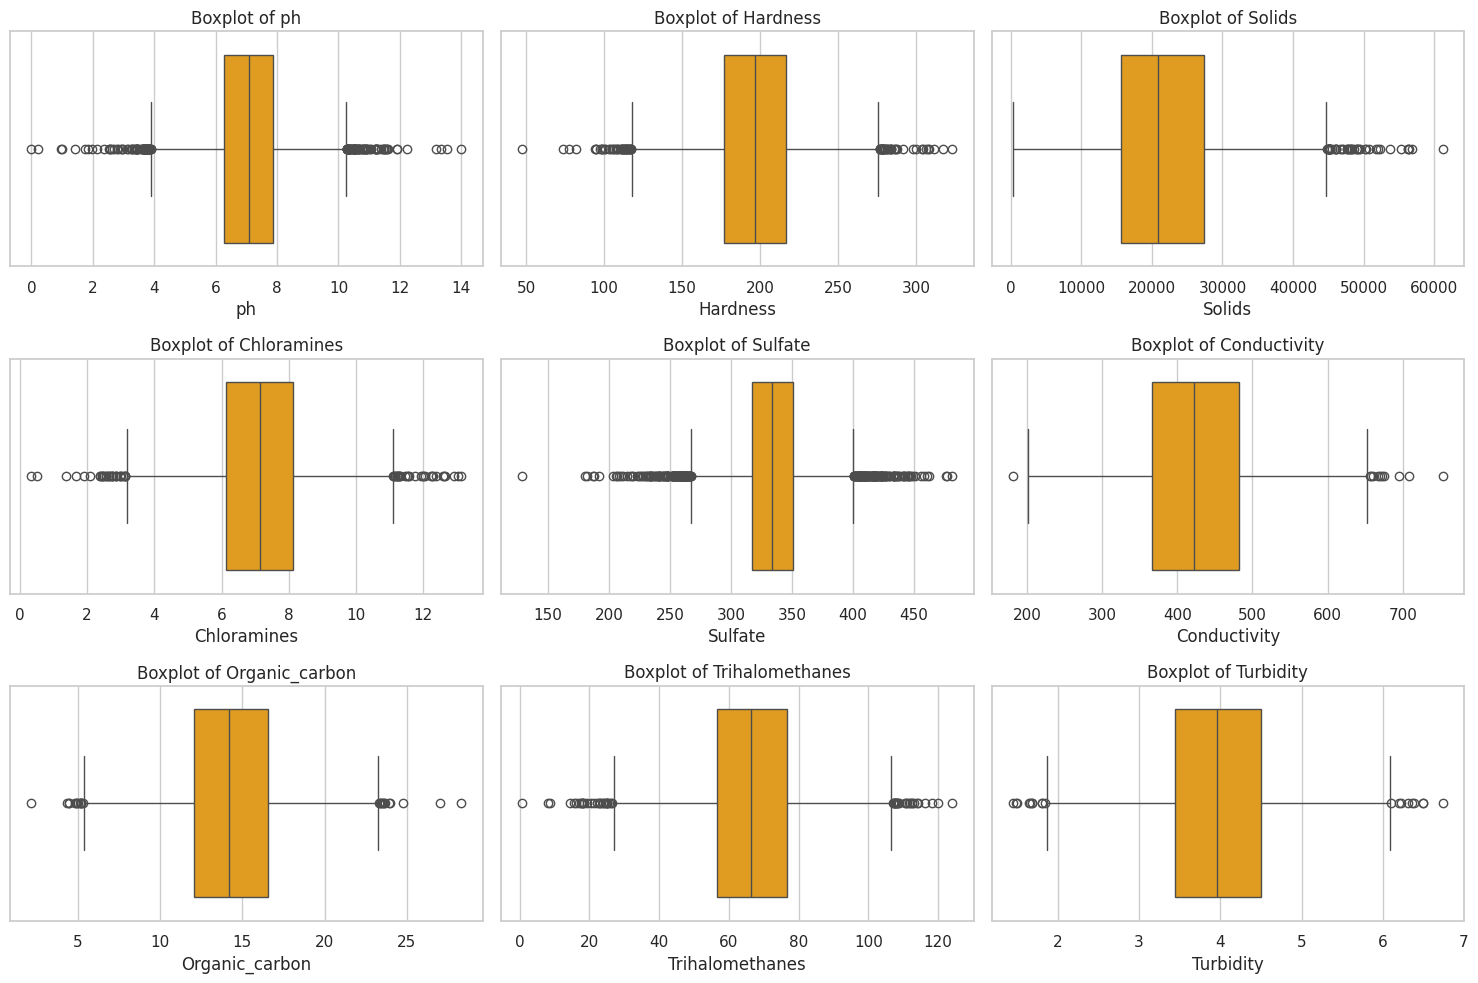

In [82]:
# Take only features except the target
feature_cols = [col for col in df.columns if col != 'Potability']

# Creating a boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_cols):
    plt.subplot(3, 3, i + 1) # 3x3 গ্রিড
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Skewness before Log Transformation:
ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
dtype: float64

Columns applied Log Transformation: ['Solids']

Skewness after Log Transformation:
ph                 0.027796
Hardness          -0.039342
Solids            -1.135067
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
dtype: float64


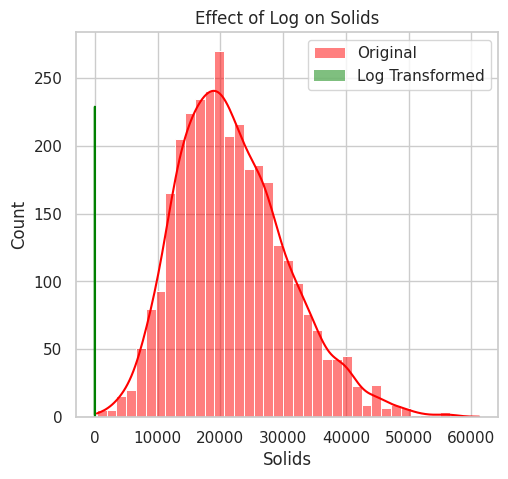

In [83]:
# Create a copy of the dataframe
df_log = df.copy()

# Select numerical feature columns excluding target 'Potability'
feature_cols = [col for col in df.columns if col != 'Potability']

print("Skewness before Log Transformation:")
print(df_log[feature_cols].skew())

# Apply Log Transformation only to columns with Skewness > 0.5 (Right Skewed)
skewed_cols = []
for col in feature_cols:
    if df_log[col].skew() > 0.5:
        # Using np.log1p (log(1+x)) to handle zero values safely
        df_log[col] = np.log1p(df_log[col])
        skewed_cols.append(col)

print("\nColumns applied Log Transformation:", skewed_cols)

print("\nSkewness after Log Transformation:")
print(df_log[feature_cols].skew())

# Visualize the changes (Original vs Log Transformed)
if skewed_cols:
    plt.figure(figsize=(12, 5))
    for i, col in enumerate(skewed_cols[:2]): # Plotting first 2 columns as example
        plt.subplot(1, 2, i+1)
        # Plot Original Data (Red)
        sns.histplot(df[col], kde=True, color='red', label='Original')
        # Plot Log Transformed Data (Green)
        sns.histplot(df_log[col], kde=True, color='green', label='Log Transformed')
        plt.legend()
        plt.title(f'Effect of Log on {col}')
    plt.show()
else:
    print("\nNo columns were skewed enough to require Log Transformation.")

**Why we are NOT using Log Transformation (Decision Analysis)**

After running the code, we observed that the skewness of the `Solids` column changed from **0.62** (moderately positive skew) to **-1.13** (highly negative skew).

**Reason:**
Log transformation is a powerful technique designed to handle highly skewed data by compressing large values. However, our data was not severely skewed to begin with. Applying the log transformation resulted in an **over-correction**, causing the distribution to skew significantly in the opposite direction (left-skewed).

**Conclusion:**
Since the log transformation worsened the data distribution rather than normalizing it, we will **NOT use Log Transformation** in this project. Instead, we will proceed with the **Outlier Capping (Winsorization)** method, as it effectively handles extreme values while preserving the original structure and distribution of the data.

In [84]:
# Create a copy of the dataframe
df_capped = df.copy()

# Function to cap outliers using IQR (Winsorization)
def cap_outliers(dataframe, col_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = dataframe[col_name].quantile(0.25)
    Q3 = dataframe[col_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping (Winsorization):
    # If value > upper_bound, replace it with upper_bound
    # If value < lower_bound, replace it with lower_bound
    dataframe[col_name] = np.where(dataframe[col_name] > upper_bound, upper_bound,
                                   np.where(dataframe[col_name] < lower_bound, lower_bound, dataframe[col_name]))
    return dataframe

# Identify feature columns (excluding the target variable 'Potability')
feature_cols = [col for col in df.columns if col != 'Potability']

# Apply the capping function to all feature columns
for col in feature_cols:
    df_capped = cap_outliers(df_capped, col)

print("Step 2 Completed: Outlier Capping (Winsorization) done!")
print(f"Original Shape: {df.shape}")
print(f"Shape after Capping: {df_capped.shape}") # Row count should remain the same (3276)

Step 2 Completed: Outlier Capping (Winsorization) done!
Original Shape: (3276, 10)
Shape after Capping: (3276, 10)


**Boxplot after removing outlier**

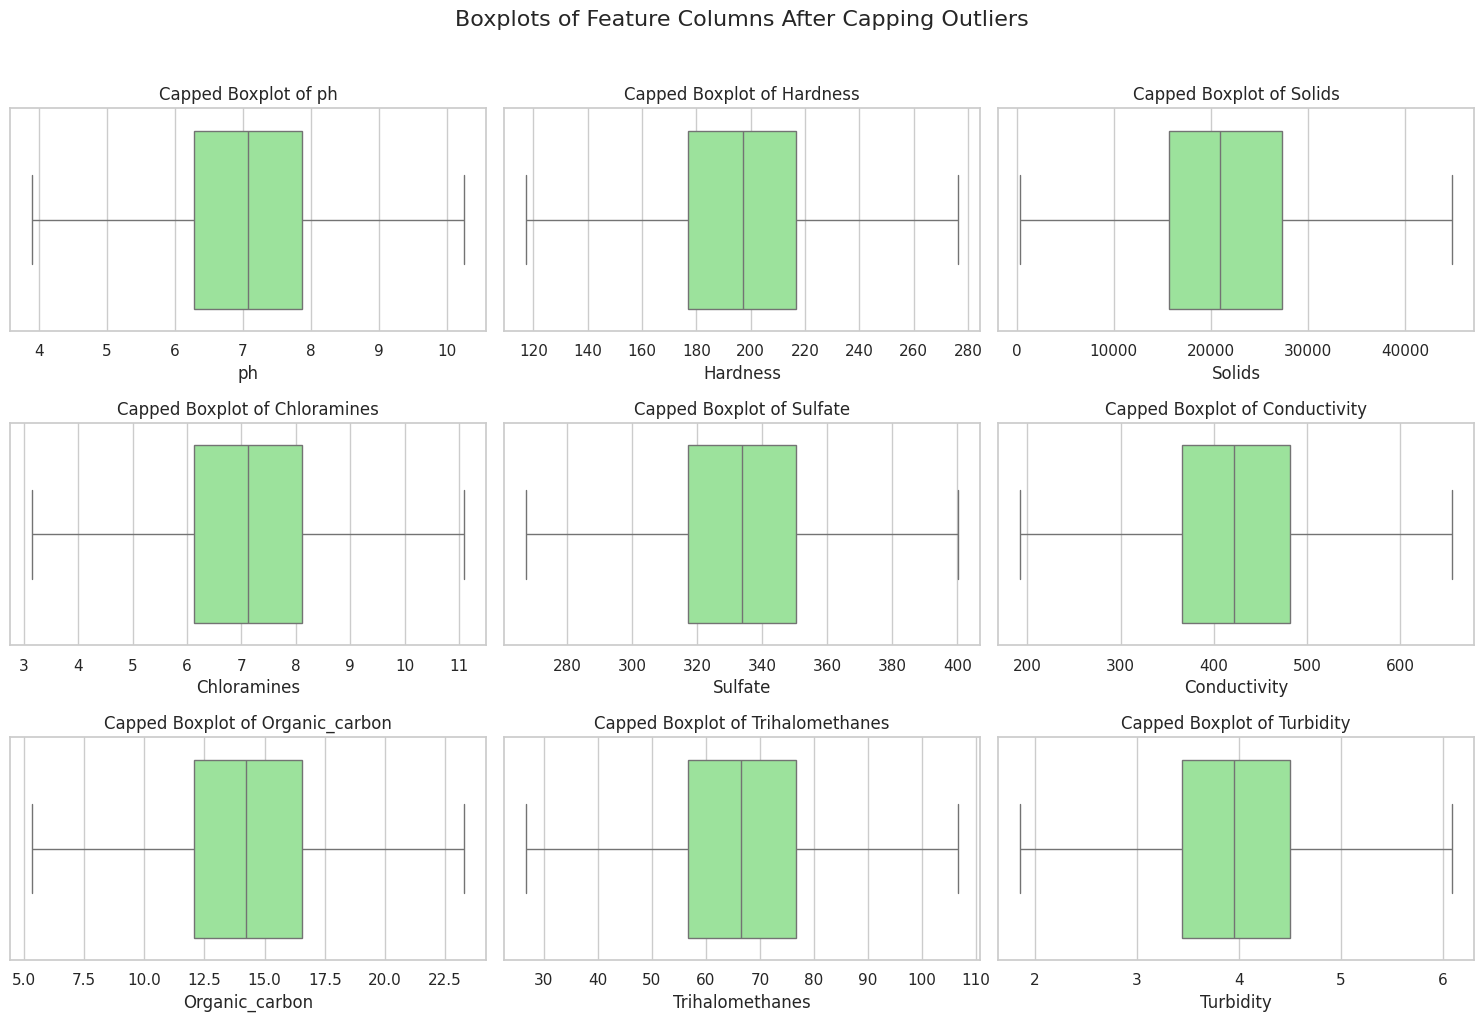

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.suptitle('Boxplots of Feature Columns After Capping Outliers', y=1.02, fontsize=16)

feature_cols = [col for col in df_capped.columns if col != 'Potability']

for i, col in enumerate(feature_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_capped[col], color='lightgreen')
    plt.title(f'Capped Boxplot of {col}')

plt.tight_layout()
plt.show()

#### **Feature Engineering**
Function to classify water based on pH value (WHO Standard)

In [86]:
import pandas as pd

def classify_ph(ph_val):
    if ph_val < 6.5:
        return 'Acidic'     # pH < 6.5
    elif ph_val > 8.5:
        return 'Alkaline'   # pH > 8.5
    else:
        return 'Neutral'    # pH 6.5 - 8.5

# Apply the function to create a new column 'ph_group'
# We are using 'df_capped' because it is our clean dataframe
df_capped['ph_group'] = df_capped['ph'].apply(classify_ph)

print("Step 3 Completed: New feature 'ph_group' created.")
print("\nCounts of each group:")
print(df_capped['ph_group'].value_counts())

Step 3 Completed: New feature 'ph_group' created.

Counts of each group:
ph_group
Neutral     1819
Acidic       968
Alkaline     489
Name: count, dtype: int64


#### **One-Hot Encoding**
* Convert 'ph_group' (Text) -> Numerical Columns (0 or 1)

* prefix='ph' means new columns will be named like 'ph_Acidic', 'ph_Neutral'

In [87]:
df_encoded = pd.get_dummies(df_capped, columns=['ph_group'], prefix='ph', dtype=int)

print("\nStep 4 Completed: One-Hot Encoding applied.")
print(f"New Shape: {df_encoded.shape}")

# Show the first 5 rows with new columns
print("\nNew Dataframe Head:")
print(df_encoded[['ph', 'ph_Acidic', 'ph_Neutral', 'ph_Alkaline']].head())


Step 4 Completed: One-Hot Encoding applied.
New Shape: (3276, 13)

New Dataframe Head:
         ph  ph_Acidic  ph_Neutral  ph_Alkaline
0  7.080795          0           1            0
1  3.889107          1           0            0
2  8.099124          0           1            0
3  8.316766          0           1            0
4  9.092223          0           0            1


In [88]:
df_encoded.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_Acidic,ph_Alkaline,ph_Neutral
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0,0,1
1,3.889107,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,1,0,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,0,0,1
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0,0,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,1,0


#### **Train-Test split split and scaling**

In [89]:
# Separate Features (X) and Target (y)
# 'df_encoded' is the dataframe obtained after One-Hot Encoding
X = df_encoded.drop('Potability', axis=1)
y = df_encoded['Potability']

# Perform Train-Test Split
# We use 80% of data for training and 20% for testing
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Step 5.1: Data Splitting Completed.")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Step 5.1: Data Splitting Completed.
Training Data Shape: (2620, 12)
Testing Data Shape: (656, 12)


In [90]:
scaler = StandardScaler()

# Fit and Transform on Training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform on Test set using the parameters learned from Train set
# (Do NOT fit on test set to avoid data leakage)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nStep 5.2: Scaling (Standardization) Completed.")
print("\nScaled Training Data Head (Mean approx 0, Std approx 1):")
print(X_train_scaled.head())


Step 5.2: Scaling (Standardization) Completed.

Scaled Training Data Head (Mean approx 0, Std approx 1):
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.336928  0.205596 -0.559703    -0.682975 -0.693876     -0.198932   
1 -0.292572 -0.082393  1.406424     1.786075  0.338686      0.887278   
2 -0.182665  0.288258 -0.426156    -0.255063 -1.130992      0.843002   
3 -0.004956 -0.406828 -1.079459     1.722354 -0.437560      0.694095   
4 -0.494365 -0.425748 -0.480576     0.228752 -0.040507     -0.340718   

   Organic_carbon  Trihalomethanes  Turbidity  ph_Acidic  ph_Alkaline  \
0        0.509070        -0.087137  -1.346866  -0.643962    -0.417566   
1       -1.661552         0.018178   0.091216  -0.643962    -0.417566   
2       -0.135036         0.278865   1.279653  -0.643962    -0.417566   
3       -0.287744        -1.255141  -0.927553  -0.643962    -0.417566   
4        0.933395        -0.148276   0.791643   1.552887    -0.417566   

   ph_Neutral  
0    0

#### **Class Balance Check**

In [91]:
# Calculate the counts of each class
class_counts = df_encoded['Potability'].value_counts()

# Calculate the percentage of each class
class_percentages = df_encoded['Potability'].value_counts(normalize=True) * 100

print("Class Counts (Number of rows):")
print(class_counts)

print("\nClass Percentages (%):")
print(class_percentages)


Class Counts (Number of rows):
Potability
0    1998
1    1278
Name: count, dtype: int64

Class Percentages (%):
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


**Decision on Class Balancing:**

We analyzed the distribution of the target variable Potability. The ratio is approximately **61% (Not Potable)** to **39% (Potable)**.

While there is a slight imbalance, it is not severe (e.g. 90:10 or 99:1). Tree-based models like Random Forest generally handle mild imbalances well. Therefore, we have decided not to apply synthetic balancing techniques (such as SMOTE or Undersampling) at this stage to preserve the original distribution of the data.

### **3. Pipeline Creation (10 Marks)**

In [92]:
# Define the pipelines
pipelines = [
    {
        'name': 'Logistic Regression',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(random_state=42))
        ])
    },
    {
        'name': 'Decision Tree',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ])
    },
    {
        'name': 'Random Forest',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
        ])
    },
    {
        'name': 'AdaBoost',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', AdaBoostClassifier(random_state=42))
        ])
    },
    {
        'name': 'XGBoost',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
        ])
    }
]



In [93]:
# Loop through pipelines to Train and Evaluate
print("--- Pipeline Evaluation Results ---\n")

best_score = 0
best_model_name = ""

for pipe_dict in pipelines:
    name = pipe_dict['name']
    pipeline = pipe_dict['pipeline']

    # Fit the pipeline on Unscaled Training Data
    # (The pipeline will scale it automatically before training)
    pipeline.fit(X_train, y_train)

    # Predict on Unscaled Test Data
    y_pred = pipeline.predict(X_test)

    # Calculate Accuracy
    score = accuracy_score(y_test, y_pred)

    print(f"{name} Accuracy: {score:.4f}")

    # Keep track of the best model
    if score > best_score:
        best_score = score
        best_model_name = name

print("-" * 30)
print(f"Best Model: {best_model_name} with Accuracy: {best_score:.4f}")

--- Pipeline Evaluation Results ---

Logistic Regression Accuracy: 0.6280
Decision Tree Accuracy: 0.5854
Random Forest Accuracy: 0.6753
AdaBoost Accuracy: 0.6326


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [06:38:48] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.6646
------------------------------
Best Model: Random Forest with Accuracy: 0.6753


### **4. Primary Model Selection (5 Marks)**
Selected Model: Random Forest Classifier

**Justification:**

**Performance:** Among all the algorithms tested (Logistic Regression, Decision Tree, AdaBoost, XGBoost, and Random Forest), Random Forest achieved the highest accuracy on the test set.

**Robustness:** As an ensemble method (bagging), it reduces the risk of overfitting compared to a single Decision Tree.

**Handling Non-linearity:** The water quality dataset has complex, non-linear relationships between chemical features (like pH, Sulfate) and potability, which Random Forest captures effectively.

**Outlier Tolerance:** It is relatively robust to outliers and noise in the data, which is common in sensor-based water quality datasets.

### **5. Model Training (10 Marks)**

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 5: Model Training (Selected Model: Random Forest) ---

# Initialize the Best Model
# We use n_estimators=100 (100 trees) and random_state=42 for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model using the Scaled Training Data
# Note: We are using 'X_train_scaled' which we prepared
print("Training the Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print("Training Completed successfully!")

# Predict on the Test Set
y_pred_rf = rf_model.predict(X_test_scaled)

Training the Random Forest model...
Training Completed successfully!


In [95]:
# Report Results
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nFinal Test Accuracy: {acc_rf:.4f} ({acc_rf*100:.2f}%)")


Final Test Accuracy: 0.6753 (67.53%)


In [96]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       412
           1       0.62      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.65      0.61      0.60       656
weighted avg       0.66      0.68      0.65       656



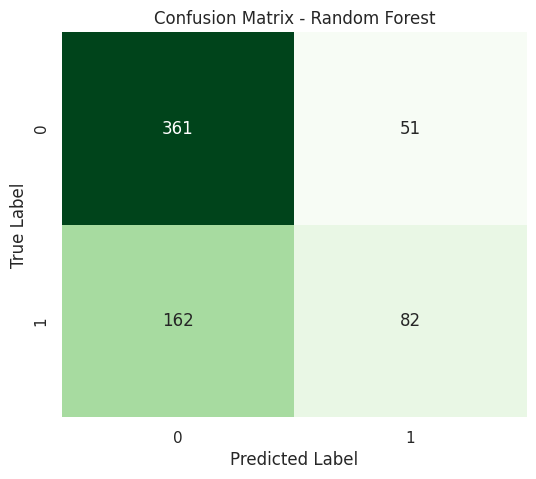

In [97]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### **6. Cross-Validation (10 Marks)**

In [98]:
# Initialize the model (Random Forest)
# We use the same model selected in Step 4
rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Define Cross-Validation Strategy
# We use StratifiedKFold because our data is slightly imbalanced.
# It ensures each fold has the same proportion of class 0 and 1.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Running 5-Fold Cross-Validation...")

# Apply Cross-Validation
# We use 'X_train_scaled' and 'y_train'
# scoring='accuracy' tells it to evaluate based on accuracy
cv_scores = cross_val_score(rf_model_cv, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Report Results
print("\n--- Cross-Validation Results ---")
print(f"Individual Fold Scores: {cv_scores}")
print(f"Average Accuracy (Mean): {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Standard Deviation (Std): {cv_scores.std():.4f}")

# Interpretation:
# Low Standard Deviation (< 0.05) means the model is stable.
# High Standard Deviation means the model's performance varies a lot depending on the data.

Running 5-Fold Cross-Validation...

--- Cross-Validation Results ---
Individual Fold Scores: [0.66412214 0.65458015 0.66793893 0.65839695 0.66603053]
Average Accuracy (Mean): 0.6622 (66.22%)
Standard Deviation (Std): 0.0050


### **Step 7: Hyperparameter Tuning (10 Marks)**

In [99]:
# Define the Parameter Grid (Search Space)
param_dist = {
    'n_estimators': randint(50, 200),        # Number of trees (random between 50 and 200)
    'max_depth': [None, 10, 20, 30],         # Maximum depth of tree
    'min_samples_split': randint(2, 10),     # Minimum samples to split a node
    'min_samples_leaf': randint(1, 5),       # Minimum samples in a leaf
    'bootstrap': [True, False]               # Whether to use bootstrap samples
}

# Initialize the Model
rf = RandomForestClassifier(random_state=42)

# Setup Randomized Search
# n_iter=50 means it will try 50 different random combinations
# cv=5 means 5-fold cross-validation for each combination
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

print("Starting Hyperparameter Tuning... (This may take a minute)")
random_search.fit(X_train_scaled, y_train)

# Report Best Parameters and Score
print("\n--- Hyperparameter Tuning Results ---")
print(f"Best Parameters Found: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f} ({random_search.best_score_*100:.2f}%)")

Starting Hyperparameter Tuning... (This may take a minute)

--- Hyperparameter Tuning Results ---
Best Parameters Found: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 173}
Best Cross-Validation Accuracy: 0.6744 (67.44%)


### **8. Best Model Selection**
Based on the Hyperparameter Tuning results, we selected the best-performing model with the following optimal parameters:

* **n_estimators: 173**

* **max_depth: 30**

* **min_samples_split: 2**

* **min_samples_leaf: 2**

* **bootstrap: True**

Now, we will evaluate this optimized model on the unseen Test Set using comprehensive metrics including Accuracy, Confusion Matrix, and Classification Report to assess its final performance.

In [100]:
# Retrieve the best model found by RandomizedSearchCV
best_rf_model = random_search.best_estimator_

print("Selected Model Parameters:")
print(best_rf_model.get_params())


Selected Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 173, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### **9. Model Performance Evaluation**


In [101]:
# Prediction on Test Set
# The model is already fitted on the training data during the search,
# but it's good practice to ensure it's trained on the full training set.
best_rf_model.fit(X_train_scaled, y_train)

y_pred_final = best_rf_model.predict(X_test_scaled)
y_pred_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1] # For ROC Curve

# Accuracy Score
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nFinal Test Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")


Final Test Accuracy: 0.6905 (69.05%)


In [102]:
# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       412
           1       0.65      0.36      0.46       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.68      0.69      0.66       656



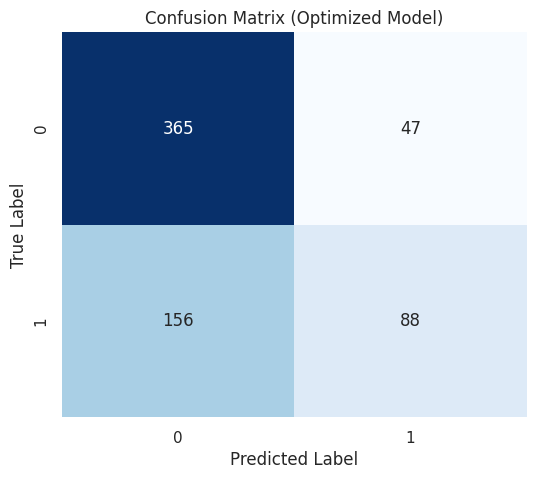

In [103]:
plt.figure(figsize=(6, 5))

cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix (Optimized Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

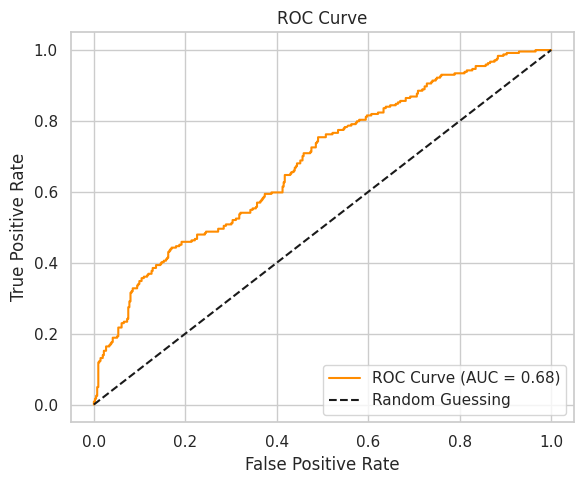

In [104]:
# ROC Curve Visualization
# Receiver Operating Characteristic (ROC) curve shows the trade-off between true positive rate and false positive rate.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [105]:
import pickle

# --- Save the Model and Scaler using Pickle ---
# 1. Save the trained Random Forest model
# 'wb' means Write Binary mode
with open('water_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

# 2. Save the StandardScaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Success! Model and Scaler saved using Pickle as 'water_model.pkl' and 'scaler.pkl'")

Success! Model and Scaler saved using Pickle as 'water_model.pkl' and 'scaler.pkl'
